# 1  Introduction

Team: 
<par> David Grogan (SCPD Student) 
<par> Peter Gjeltema (SCPD Student)

# 2 Choosing a dataset 

<par> Project Topic: MLB Baseball - Pitching Data
<par> Dataset: Lahman's Baseball Database (https://cran.r-project.org/web/packages/Lahman/Lahman.pdf)

# 3 Register a Team

[X] COMPLETE

# 4 Setting Aside a Holdout

In [18]:
# load packages
library(Lahman)
library(tidyverse)
library(GGally)

In [19]:
?Lahman

In [20]:
# # create data set combining playoff and reg season pitching stats
# cat("Pitching table dim: ", dim(PitchingPost), "\n")
# aug_pitch = inner_join(PitchingPost, Pitching, by=c("playerID", "yearID")) %>% na.omit()
# cat("Pitcher w/ Postseason clean dim: ", dim(aug_pitch), "\n")

# ##PROBLEM - DOES CLEANED DATASET GIVE ENOUGH VALUES?

# Pitcher_clean = Pitching %>% na.omit()
# #Pitcher_clean = Pitching[complete.cases(Pitching), ]
# cat("Pitcher_clean dim: ", dim(Pitcher_clean))

# ## THIS SEEMS MORE REASONABLE - LARGER N, SMALLER P

In [26]:
dim(Batting)
# TODO later: how are players who were traded midseason represented here?
aug_bat = inner_join(Batting, BattingPost, by=c("playerID", "yearID")) %>% na.omit()
dim(aug_bat)
#head(aug_bat)
#colnames(aug_bat)

aug_bat$P_SLG = (1*(aug_bat$H.y - aug_bat$X2B.y - aug_bat$X3B.y - aug_bat$HR.y)  + 2*aug_bat$X2B.y + 3*aug_bat$X3B.y + 4*aug_bat$HR.y)/aug_bat$AB.y
aug_bat$P_OBP = (aug_bat$H.y + aug_bat$BB.y + aug_bat$HBP.y)/ (aug_bat$AB.y + aug_bat$BB.y + aug_bat$HBP.y + aug_bat$SF.y)
head(aug_bat)
#fin_bat =  aug_bat[, c(1:22)], aug_bat[, c(42:44)]) #cbind(aug_bat[, c(1:22)], aug_bat[, c(42:44)])
fin_bat = aug_bat[ , -c(23:42)]
dim(fin_bat)
Pitcher_clean = fin_bat

[1] 102816     22

[1] 12594    42

,playerID,yearID,stint,teamID.x,lgID.x,G.x,AB.x,R.x,H.x,X2B.x,⋯,CS.y,BB.y,SO.y,IBB.y,HBP.y,SH.y,SF.y,GIDP.y,P_SLG,P_OBP
1837,behrmha01,1947,1,BRO,NL,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2004,johnske01,1950,1,SLN,NL,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2037,hoguebo01,1951,3,NYA,AL,7,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2043,konikal01,1951,1,NY1,NL,3,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2199,amorosa01,1955,1,BRO,NL,119,388,59,96,16,⋯,0,4,4,1,1,0,0,0,0.5833333,0.5294118
2200,bauerha01,1955,1,NYA,AL,139,492,97,137,20,⋯,1,0,1,0,0,0,0,0,0.4285714,0.4285714


[1] 12594    24

In [27]:
# 80-20 split
set.seed(1)
set_size = dim(Pitcher_clean)[1]
train = sample(seq(set_size), 0.8*set_size)
clean_pitching_train = Pitcher_clean[train, ]
clean_pitching_test = Pitcher_clean[-train, ]

# 5 Investigating and Exploring the Data

In [28]:
# basic stats on dataset
head(Pitcher_clean)
summary(Pitcher_clean)
sapply(Pitcher_clean, sd, na.rm=TRUE)

,playerID,yearID,stint,teamID.x,lgID.x,G.x,AB.x,R.x,H.x,X2B.x,⋯,CS.x,BB.x,SO.x,IBB.x,HBP.x,SH.x,SF.x,GIDP.x,P_SLG,P_OBP
1837,behrmha01,1947,1,BRO,NL,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2004,johnske01,1950,1,SLN,NL,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2037,hoguebo01,1951,3,NYA,AL,7,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2043,konikal01,1951,1,NY1,NL,3,0,0,0,0,⋯,0,0,0,0,0,0,0,0,NaN,NaN
2199,amorosa01,1955,1,BRO,NL,119,388,59,96,16,⋯,5,55,45,5,6,2,4,8,0.5833333,0.5294118
2200,bauerha01,1955,1,NYA,AL,139,492,97,137,20,⋯,4,56,65,1,8,4,3,4,0.4285714,0.4285714


   playerID             yearID         stint          teamID.x    lgID.x   
 Length:12594       Min.   :1947   Min.   :1.000   NYA    :1230   AA:   0  
 Class :character   1st Qu.:1986   1st Qu.:1.000   SLN    : 880   AL:6252  
 Mode  :character   Median :2000   Median :1.000   LAN    : 714   FL:   0  
                    Mean   :1996   Mean   :1.091   ATL    : 704   NA:   0  
                    3rd Qu.:2009   3rd Qu.:1.000   BOS    : 656   NL:6342  
                    Max.   :2016   Max.   :3.000   OAK    : 624   PL:   0  
                                                   (Other):7786   UA:   0  
      G.x              AB.x            R.x              H.x        
 Min.   :  1.00   Min.   :  0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 34.00   1st Qu.:  5.0   1st Qu.:  0.00   1st Qu.:  1.00  
 Median : 67.00   Median :116.0   Median : 14.00   Median : 29.00  
 Mean   : 77.53   Mean   :208.2   Mean   : 29.71   Mean   : 56.24  
 3rd Qu.:123.00   3rd Qu.:405.8   3rd Qu.: 54.00   3

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.”Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector.”

playerID      yearID       stint    teamID.x      lgID.x         G.x 
         NA  15.2216541   0.2956226  40.7444334   1.5000213  47.7757002 
       AB.x         R.x         H.x       X2B.x       X3B.x        HR.x 
215.3054116  34.5103757  61.9895702  12.3471049   2.1502661   9.7696655 
      RBI.x        SB.x        CS.x        BB.x        SO.x       IBB.x 
 34.0177719   8.7217615   2.9903236  26.7087557  39.0227448   3.7712304 
      HBP.x        SH.x        SF.x      GIDP.x       P_SLG       P_OBP 
  3.1888864   3.1913433   2.5415015   5.7712933   0.3627537   0.2234774

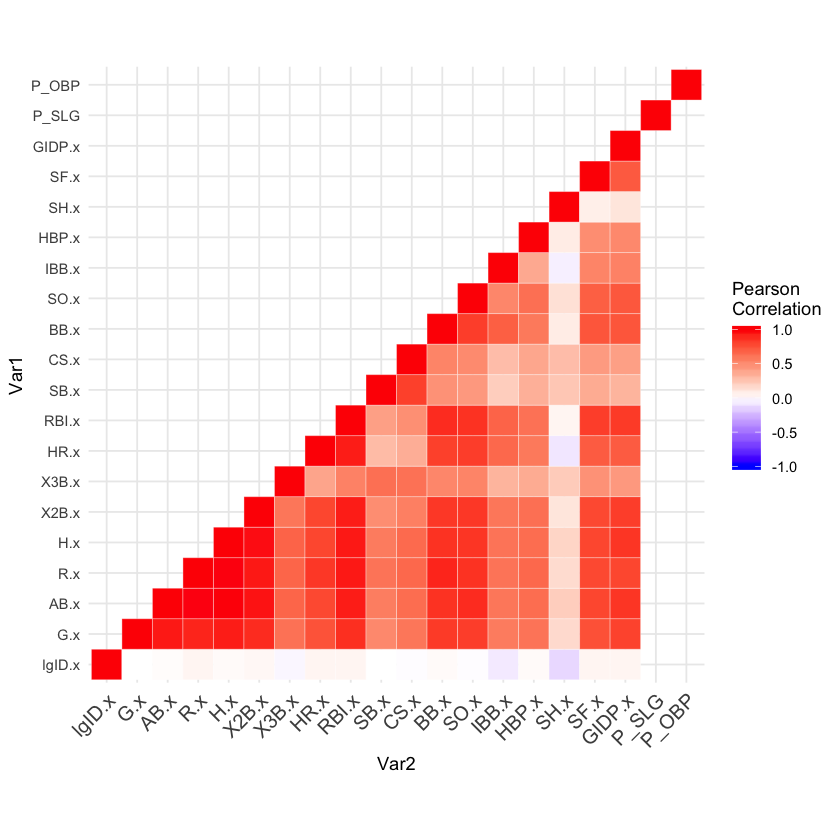

In [29]:
#Pitcher_clean$playerID = as.factor(Pitcher_clean$playerID)
#Pitcher_clean$yearID = as.factor(Pitcher_clean$yearID)
#Pitcher_clean$stint = as.factor(Pitcher_clean$stint)
#Pitcher_clean$teamID = as.factor(Pitcher_clean$teamID)
#Pitcher_clean$lgID = as.factor(Pitcher_clean$lgID)
#head(Pitcher_clean)
#cor(Pitcher_clean)

## CORRELATIONS
library(reshape2)
Pitcher_clean$lgID.x = ifelse(Pitcher_clean$lgID.x=="AL", 1, 0)
#head(Pitcher_clean)
cormat = round(cor(Pitcher_clean[, -c(1, 2, 3, 4)]), 2)
melted_cormat = melt(cormat)
# ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
#   geom_tile()

# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }

upper_tri <- get_upper_tri(cormat)
#upper_tri

# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

In [30]:
# correlations specific to wins
ggpairs(Pitcher_clean[ , c(6, 9, 13, 18, 25)])

ERROR: Error in `[.data.frame`(Pitcher_clean, , c(6, 9, 13, 18, 25)): undefined columns selected


In [ ]:
# correlations specific to ER
ggpairs(Pitcher_clean[ , c(6, 9, 13, 18, 25)])